In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import librosa

In [52]:
# Load the dataset
data = pd.read_csv("/content/Dataset_Parkinson_Disease_Detection_SIP_Project_Group11.csv")

In [53]:
import librosa
import pandas as pd

def extract_features(row, sr=1000, n_mfcc=13, dct_type=2, norm='ortho', hop_length=512, n_fft=1024, win_length=400, window='hann'):
    numeric_values = row.astype(float).values
    mfccs = librosa.feature.mfcc(y=numeric_values, sr=sr, n_mfcc=n_mfcc, dct_type=dct_type, norm=norm, hop_length=hop_length, n_fft=n_fft, win_length=win_length, window=window)

    # Initialize an empty dictionary to store features
    features = {}

    # Iterate over the range of n_mfcc
    for i in range(mfccs.shape[0]):
        features[f"mfcc{i+1}_min"] = mfccs[i, :].min()
        features[f"mfcc{i+1}_max"] = mfccs[i, :].max()
        features[f"mfcc{i+1}_std"] = mfccs[i, :].std()
        features[f"mfcc{i+1}_var"] = mfccs[i, :].var()

    return pd.Series(features)

In [54]:
# Apply feature extraction to numeric columns (excluding "status")
numeric_columns = data.select_dtypes(include=[float, int]).columns
features = data[numeric_columns].apply(extract_features, axis=1)

# Combine features with the original dataset
data = pd.concat([data, features], axis=1)

# Identify features and target variable
X = data.drop(["status"], axis=1)
y = data["status"]

# Exclude non-numeric columns
X_numeric = X.select_dtypes(include=[float, int])

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=23
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWa

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a model (K-Nearest Neighbors as an example)
model_knn = KNeighborsClassifier(n_neighbors=3)
# Train the model
model_knn.fit(X_train_scaled, y_train)
# Make predictions
y_pred_knn = model_knn.predict(X_test_scaled)

In [56]:
def print_patient_counts(y):
    healthy_count = y.value_counts()[0]
    parkinson_count = y.value_counts()[1]

    print(f"Total Healthy Patients: {int(healthy_count/6)}")
    print(f"Total Parkinson's Patients: {int(parkinson_count/6)}")

# Print total number of healthy and Parkinson's patients in the dataset
print_patient_counts(y)

Total Healthy Patients: 8
Total Parkinson's Patients: 24


In [57]:
# Evaluate K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
formatted_accuracy_knn = "{:.2f}".format(accuracy_knn * 100)
print("\nK-Nearest Neighbors:")
print(f"Accuracy: {formatted_accuracy_knn}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 89.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



In [58]:
!pip install scikit-plot

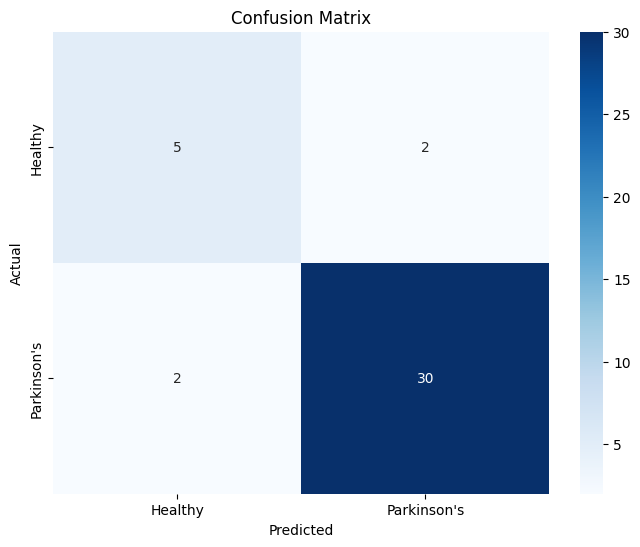

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
